In [1]:
import numpy as np
from obspy.core import read, UTCDateTime
import matplotlib.pyplot as plt

In [2]:
path_to_files = '/Users/sydneydybing/StrainProject/2024/'

dist_array = np.load(path_to_files + 'NA_evt-sta_dist_array_less500km_withdata_withrmssnrs_FILTERED.npy')


In [3]:
dist_array[0]

array(['2023-04-13_M6', '2023-04-13T15:54:53.808Z', '49.215', '-129.6178',
       '6.0', 'B001', '48.04307', '-123.13141', '495.399747368',
       '1.2227311375'],
      dtype='<U32')

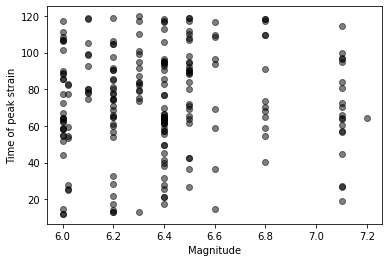

In [44]:
count = 0
max_peak_strain_time = []

for idx in range(len(dist_array)):
    
    event_id = dist_array[idx,0]
    mag = dist_array[idx,4]
    sta = dist_array[idx,5]
    hypdist = dist_array[idx,8]
    
    try:
        pst = read(path_to_files + 'strain_data/3comp_peak_post_p/' + str(event_id) + '/' + str(sta) + '.mseed')
    except:
        continue
    
    count += 1
    # plt.plot(pst[0].data)

    i = np.where(pst[0].data == max(pst[0].data))[0]
    # print(i)
    
    # plt.axvline(i[0], color = 'red')
    # plt.xlim(i[0] - 5, i[0] + 5)
    # plt.ylim(max(pst[0].data)*0.9, max(pst[0].data)*1.1)
    # plt.show()
    
    max_pst_time = i[0] / pst[0].stats.sampling_rate
    
    plt.scatter(float(mag), max_pst_time, color = 'black', alpha = 0.5)
    plt.xlabel('Magnitude')
    plt.ylabel('Time of peak strain')
    # plt.semilogy()
    
    max_peak_strain_time.append(max_pst_time)

plt.show()
    
    
    

In [43]:
print(count)

216


In [39]:
import pandas as pd

In [40]:
na_mcmc_results = pd.read_csv(path_to_files + '3comp_mcmc_arrays/mcmc_results_summary_with_quality.csv')

na_good_results = na_mcmc_results[na_mcmc_results['two_line_fit_qual'] == 'g']
na_bad_results = na_mcmc_results[na_mcmc_results['two_line_fit_qual'] == 'b']

In [41]:
na_mcmc_results

,eq_id,mag,sta,hypdist,xhigh,m1,m2,xinter,sigma,trans_time,two_line_fit_qual
0,2023-04-13_M6,6.0,B006,468,60,0.257992,0.007761,11.985887,0.045496,12.0,g
1,2023-04-13_M6,6.0,B012,299,60,0.197936,0.018381,12.839701,0.083800,12.9,g
2,2023-04-13_M6,6.0,B927,349,60,1.232677,0.009634,11.171436,0.065695,11.2,g
3,2023-04-13_M6,6.0,B928,330,60,0.625950,0.012774,11.773367,0.060353,11.8,g
4,2022-12-20_M6.4,6.4,B030,406,40,0.159900,0.033257,14.267363,0.100500,14.3,g
...,...,...,...,...,...,...,...,...,...,...,...
211,2010-01-10_M6.5,6.5,B035,232,35,0.570517,0.027842,12.965645,0.160991,13.0,g
212,2010-01-10_M6.5,6.5,B036,233,35,0.579143,0.029420,12.933781,0.160575,13.0,g
213,2010-01-10_M6.5,6.5,B057,344,35,0.104849,0.013884,17.153798,0.055897,17.2,g
214,2010-01-10_M6.5,6.5,B933,89,35,0.867501,0.053952,12.495001,0.128224,12.5,g


In [45]:
time_to_transition = na_mcmc_results['xinter'].values - 10

In [55]:
trans_max_ratio = np.array(max_peak_strain_time) / time_to_transition

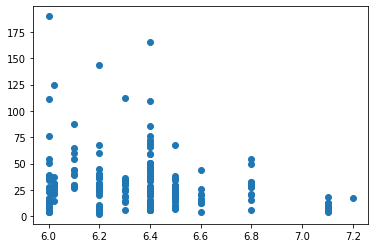

In [56]:
plt.scatter(na_mcmc_results['mag'], trans_max_ratio)
# plt.semilogy();

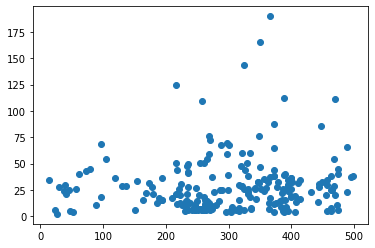

In [57]:
plt.scatter(na_mcmc_results['hypdist'], trans_max_ratio)

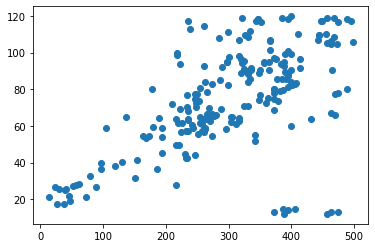

In [61]:
plt.scatter(na_mcmc_results['hypdist'], np.array(max_peak_strain_time))
# plt.semilogy()

In [63]:
mcmc_array = na_mcmc_results.values
mcmc_array

array([['2023-04-13_M6', 6.0, 'B006', ..., 0.0454963877111, 12.0, 'g'],
       ['2023-04-13_M6', 6.0, 'B012', ..., 0.0838002788574, 12.9, 'g'],
       ['2023-04-13_M6', 6.0, 'B927', ..., 0.0656949651442, 11.2, 'g'],
       ..., 
       ['2010-01-10_M6.5', 6.5, 'B057', ..., 0.0558969235535, 17.2, 'g'],
       ['2010-01-10_M6.5', 6.5, 'B933', ..., 0.128224279858, 12.5, 'g'],
       ['2010-01-10_M6.5', 6.5, 'B935', ..., 0.0876165719474, 12.1, 'g']], dtype=object)

In [76]:
# Get mean transition time by event

mcmc_array = na_mcmc_results.values

unique_eventids = np.unique(mcmc_array[:,0])
# unique_eventids

mags = []
mean_trans_times = []
mean_m1s = []
mean_m2s = []

for uni_id in unique_eventids:
    
    # print(uni_id)
    i = np.where(uni_id == mcmc_array[:,0])[0]
    # print(i)
    
    m1s = mcmc_array[i,5].astype(float)
    m2s = mcmc_array[i,6].astype(float)
    trans_times = mcmc_array[i,7].astype(float)-10
    mag = mcmc_array[i,1].astype(float)[0]
    # print(mag)
    # print(trans_times)
    
    mean_trans_time = np.mean(trans_times)
    mean_m1 = np.mean(m1s)
    mean_m2 = np.mean(m2s)
    
    mags.append(mag)
    mean_trans_times.append(mean_trans_time)
    mean_m1s.append(mean_m1)
    mean_m2s.append(mean_m2)
    
mags = np.array(mags)
mean_trans_times = np.array(mean_trans_times)
mean_m1s = np.array(mean_m1s)
mean_m2s = np.array(mean_m2s)

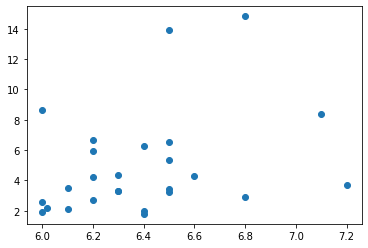

In [86]:
m, b = np.polyfit(mags, mean_trans_times, 1)
plt.scatter(mags, mean_trans_times);
# plt.plot(mags, mags*m + b, color = 'red');

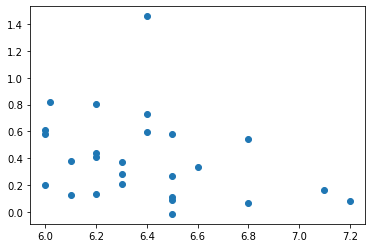

In [79]:
plt.scatter(mags, mean_m1s);

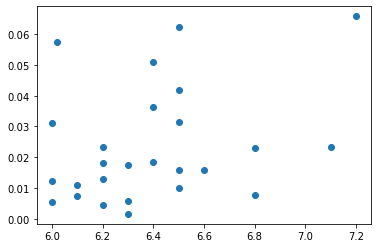

In [80]:
plt.scatter(mags, mean_m2s);